# Conversation Rate Analysis

## 1. Required Libraries

The following Python libraries are used for data manipulation, analysis, and visualization:

- `pandas`: For handling and manipulating data in DataFrame structures.
- `numpy`: For numerical operations and computations.
- `matplotlib`: For creating static visualizations and plots.
- `seaborn`: For enhanced data visualization with a clean aesthetic.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Conversion Rate Calculation

This section covers the steps taken to calculate the conversion rate for the marketing dataset.
## Steps:
### 1. Load Data and Parse Date Columns

- Loaded the marketing data from a CSV file.
- Parsed the date columns (`date_served`, `date_subscribed`, `date_canceled`) into datetime format for date-based analysis.

### 2. Calculate Total Conversion Rate

- Calculated the total number of unique users who were marketed to.
- Counted the number of users who subscribed (those where `converted == True`).
- Computed the overall conversion rate by dividing subscribers by total users and multiplying by 100 to get the percentage.
- Printed the final conversion rate as a percentage.

### 3. Create a Conversion Rate Function

  


In [2]:
# Load the dataset
marketing = pd.read_csv("C:/Users/User/Downloads/marketing.csv", 
                        parse_dates=["date_served", "date_subscribed", "date_canceled"])
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = (subscribers / total)*100
print(f"Out of {total} people marketed to, {subscribers} subscribed, resulting in an overall conversion rate of {round(conversion_rate, 2)}%")


Out of 7309 people marketed to, 1015 subscribed, resulting in an overall conversion rate of 13.89%


In [3]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = (conversion_rate.fillna(0))*100
    return conversion_rate

# 3. Conversion Rate by Language

In this section, we calculate the conversion rate by the language in which the marketing message was displayed. The conversion rate is computed for each language, and a pie chart is created to visualize the differences.

## Steps:
### 1. Grouping by `language_displayed`

- Grouped the dataset by the `language_displayed` column to count the total number of unique users for each language.

### 2. Count Conversions

- Filtered the data to include only the users who converted (`converted == True`).
- Grouped the filtered data by `language_displayed` to count the number of unique conversions for each language.

### 3. Calculate Conversion Rate by Language

- Divided the number of unique conversions by the total number of unique users for each language to get the conversion rate.
  
### 4. Plot the Pie Chart

- Created a bar chart to visualize the conversion rate for each language.



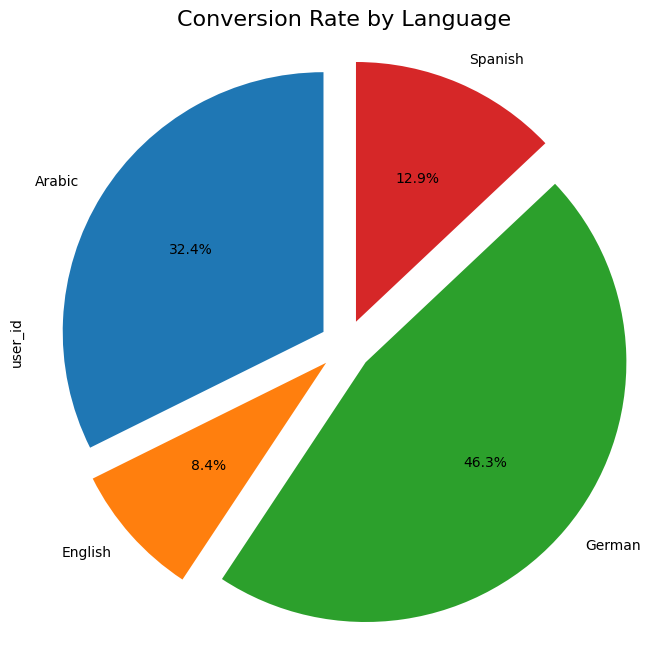

In [5]:
# Calculate conversion rate grouped by language_displayed
language_conversion_rate = conversion_rate(marketing, ['language_displayed'])

# Print the conversion rates by language
#print(language_conversion_rate)

# Create a pie chart using the conversion rates

plt.figure(figsize=(8, 8))  # Set the figure size for better readability
language_conversion_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.1]*len(language_conversion_rate))

# Add a title
plt.title('Conversion Rate by Language', size=16)

# Equalize the pie chart for a perfect circle
plt.axis('equal')

# Display the plot
plt.show()

# 4. Daily Conversion Rate Visualization

In this section, we calculate and visualize the daily conversion rate over time. The visualization helps to track conversion rate trends across different days.

## Steps:

1. **Calculate Daily Conversion Rate**: 
   - Used the `conversion_rate` function to compute conversion rates grouped by `date_served`.

2. **Convert to DataFrame**: 
   - Reset the index and renamed the columns for better readability.

3. **Visualize the Data**: 
   - Created a professional line plot with markers to display daily conversion rate changes.
   - Added titles, axis labels, and gridlines for a cleaner look.


In [7]:
# Calculate conversion rate grouped by date_served
daily_conversion_rate = conversion_rate(marketing, ['date_served'])

# Reset index to turn the result into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())

# Rename the columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']




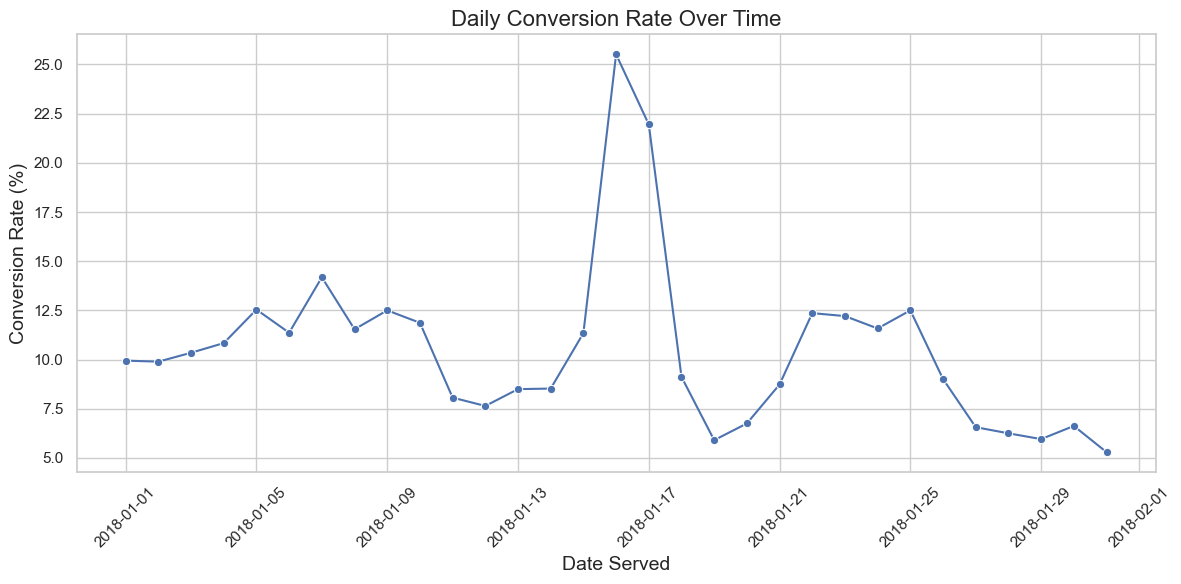

In [10]:
# Set the aesthetic style for the plot
sns.set(style='whitegrid')

# Create a line plot for daily conversion rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_served', y='conversion_rate', data=daily_conversion_rate, marker='o', color='b')

# Add title and labels
plt.title('Daily Conversion Rate Over Time', fontsize=16)
plt.xlabel('Date Served', fontsize=14)
plt.ylabel('Conversion Rate (%)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for a cleaner look
plt.grid(True)

# Tight layout for a better visual appearance
plt.tight_layout()

# Show the plot
plt.show()


# 5. Conversion Rate Visualization Across Different Columns

In this section, we visualize the conversion rates across several key dimensions in the marketing dataset. We generate subplots to display conversion rates based on different columns such as marketing channel, variant, and language preferences. The visualization helps in understanding how these factors influence conversion rates.

## Steps:

1. **Identify Key Columns**:
   - Selected columns for conversion rate analysis: `marketing_channel`, `variant`, `language_displayed`, `language_preferred`, `age_group`, and `subscribing_channel`.

2. **Subplot Setup**:
   - Created a 2x3 grid for visualizing conversion rates across six columns.

3. **Plot Conversion Rates**:
   - Calculated conversion rates using the custom `conversion_rate` function.
   - For each column, plotted the conversion rate using bar charts.

4. **Formatting**:
   - Added titles and axis labels for each subplot.
   - Rotated x-axis labels for better readability.
   - Adjusted layout to ensure elements don’t overlap, creating a professional visualization.



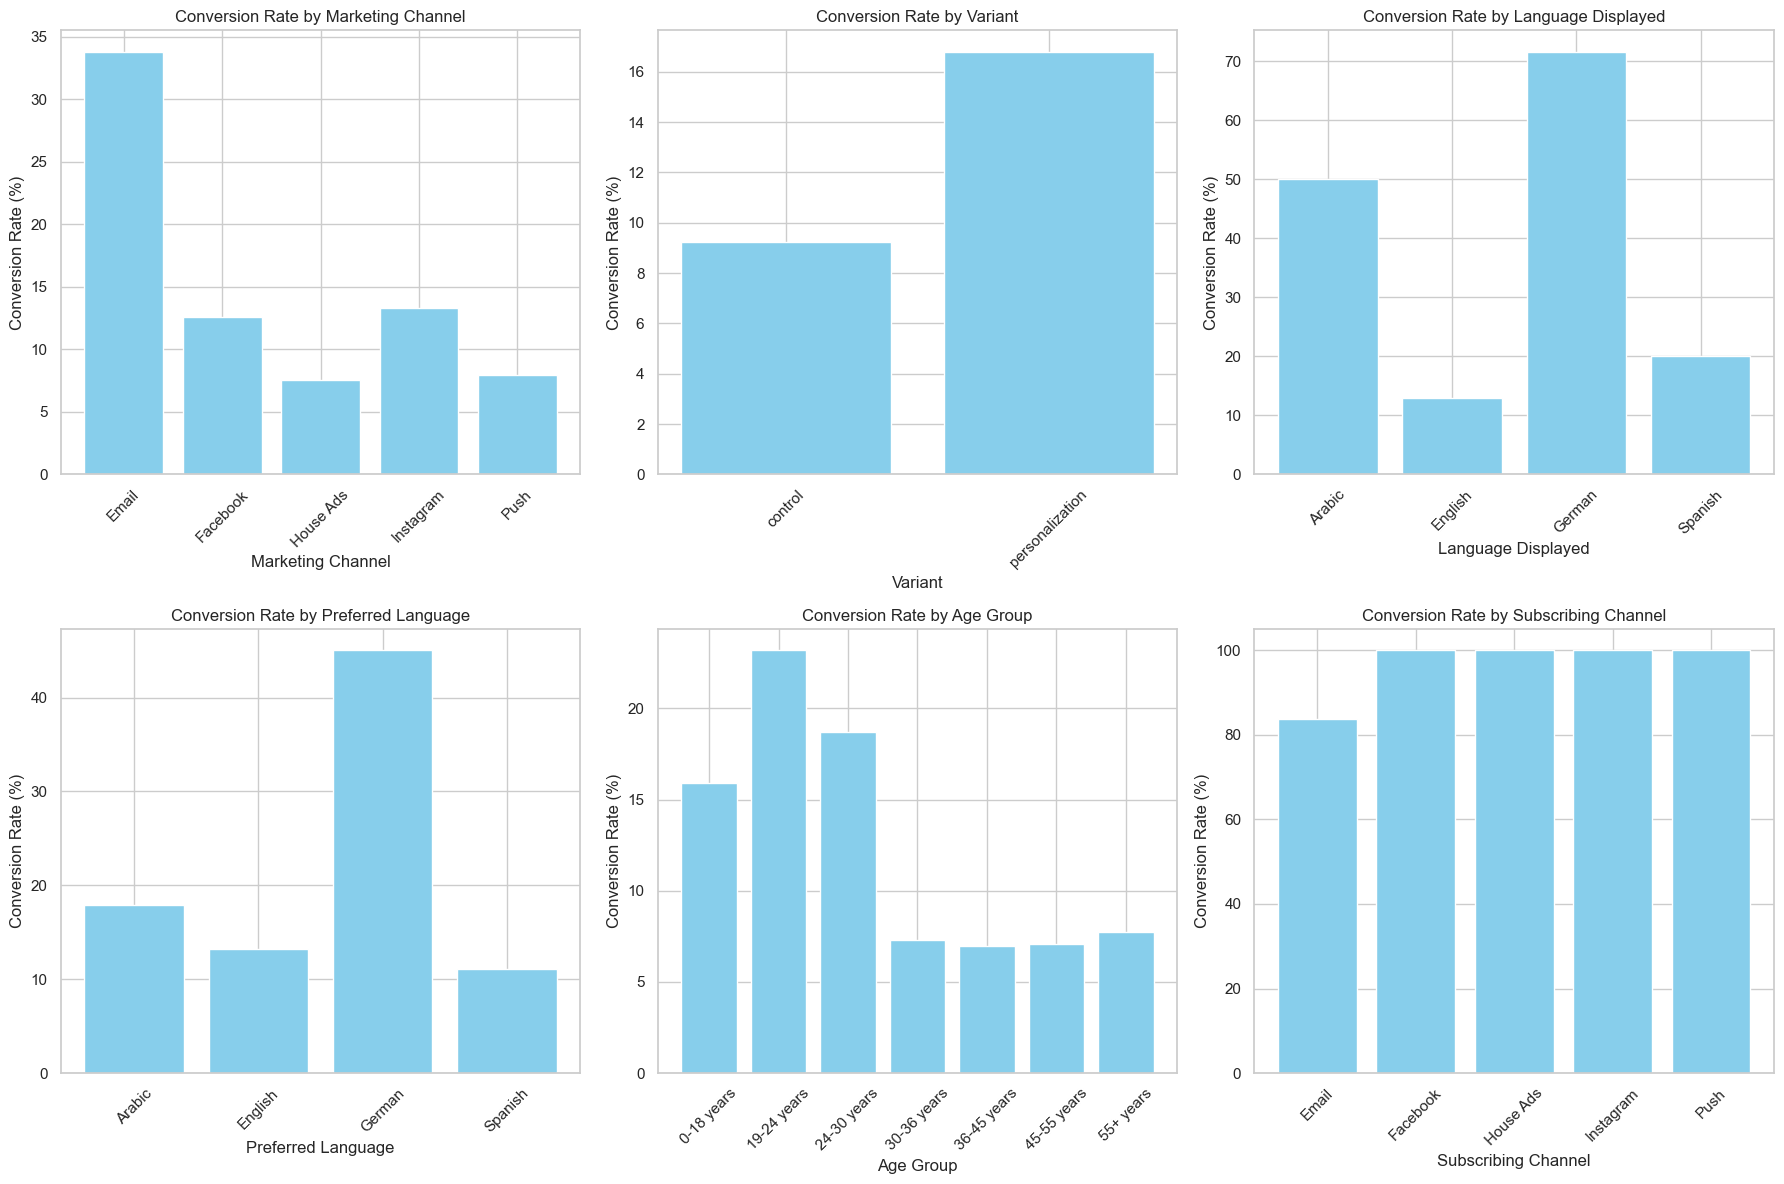

In [12]:
import matplotlib.pyplot as plt

# Columns for conversion rate calculation
columns_to_check = ['marketing_channel', 'variant', 'language_displayed', 'language_preferred', 'age_group', 'subscribing_channel']
professional_labels = {
    'marketing_channel': 'Marketing Channel',
    'variant': 'Variant',
    'language_displayed': 'Language Displayed',
    'language_preferred': 'Preferred Language',
    'age_group': 'Age Group',
    'subscribing_channel': 'Subscribing Channel'
}

# Set up the subplot grid: 2 rows, 3 columns (since we have 6 columns to check)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Calculate and visualize conversion rate for each column
convertion_rates = {}
for i, column in enumerate(columns_to_check):
    convertion_rate = conversion_rate(marketing, column)  # Assuming this is a function you have
    convertion_rates[column] = convertion_rate
    
    # Visualize the conversion rate in subplots
    axes[i].bar(convertion_rate.index, convertion_rate.values, color='skyblue')
    axes[i].set_title(f'Conversion Rate by {professional_labels[column]}')
    axes[i].set_ylabel('Conversion Rate (%)')
    axes[i].set_xlabel(professional_labels[column])
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping elements
plt.tight_layout()
plt.show()


### Findings from Conversion Rate Analysis

The visualization of conversion rates across different dimensions in the marketing dataset reveals several important insights:

- **Marketing Channel**: The highest conversion rate was observed from the **email** channel, indicating its effectiveness in driving conversions compared to other channels.
  
- **Variant**: Among the tested variants, **personalization** stood out with the highest conversion rate, demonstrating the importance of tailored marketing content.

- **Language Displayed & Language Preferred**: Users who were shown ads in **German** and had **German** as their preferred language had the highest conversion rates, suggesting that localization plays a key role in engaging customers.

- **Age Group**: The age group of users **up to 30 years old** exhibited the highest conversion rate, indicating a stronger engagement from younger audiences.

These findings offer actionable insights for optimizing future marketing strategies, focusing on channels, content personalization, localization, and targeting younger demographics to improve conversion rates.


# 6. Daily Conversion Rate by Marketing Channel

In this section, we calculate and visualize the daily conversion rate for each marketing channel. The analysis provides insight into how conversion rates change over time across different marketing channels.

## Steps:

1. **Calculate Conversion Rate**:
   - Used the `conversion_rate` function to calculate conversion rates, grouped by `date_served` and `marketing_channel`.

2. **Convert to DataFrame**:
   - Reset the index to convert the Series into a DataFrame for easier manipulation.

3. **Extract Unique Channels**:
   - Retrieved the unique marketing channels to create individual subplots for each channel.

4. **Subplot Grid**:
   - Created a grid of subplots where each marketing channel has its own subplot showing the conversion rate over time.

5. **Plotting**:
   - Plotted the daily conversion rates for each marketing channel with a professional layout, including titles and labels for each subplot.

6. **Layout Adjustment**:
   - Applied tight layout adjustments to ensure proper spacing and visibility of the subplots.


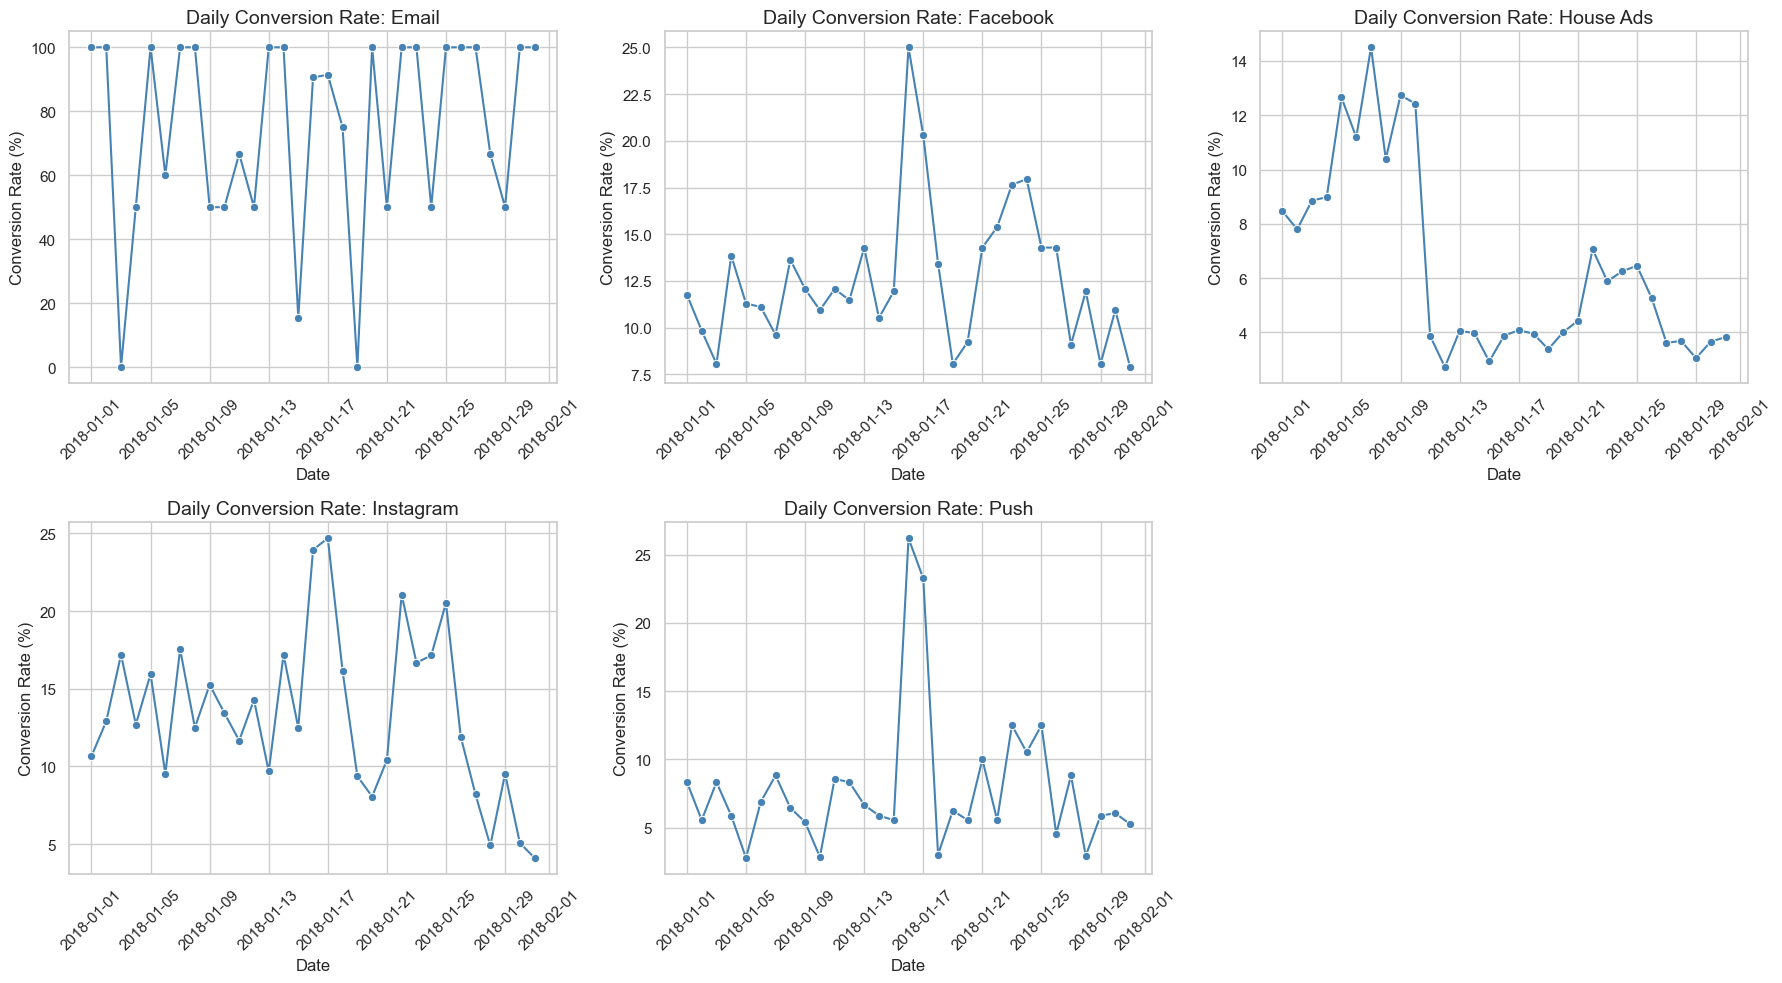

In [20]:
# Step 1: Calculate conversion rate by date served and marketing channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Step 2: Convert the Series to a DataFrame
daily_conv_channel = daily_conv_channel.reset_index()

# Step 3: Get unique marketing channels to plot each in a separate subplot
unique_channels = daily_conv_channel['marketing_channel'].unique()

# Step 4: Set up the subplot grid (rows and columns based on the number of unique marketing channels)
num_channels = len(unique_channels)
rows = (num_channels // 3) + 1  # 3 subplots per row
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, 10))  # Adjust the figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Step 5: Plot each marketing channel's conversion rate over time in its own subplot
for i, channel in enumerate(unique_channels):
    channel_data = daily_conv_channel[daily_conv_channel['marketing_channel'] == channel]
    sns.lineplot(data=channel_data, x='date_served', y='user_id', ax=axes[i], marker='o', color='steelblue')
    axes[i].set_title(f'Daily Conversion Rate: {channel}', fontsize=14)
    axes[i].set_xlabel('Date', fontsize=12)
    axes[i].set_ylabel('Conversion Rate (%)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Step 6: Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 7: Tight layout for better spacing
plt.tight_layout()

# Step 8: Show the plot
plt.show()

# Findings from Conversion Rate Analysis (12 January - 17 January)

From 12 January to 17 January, all marketing channels show a noticeable spike in conversion rates. However, during this period, **House Ads** exhibited the lowest conversion rate compared to other channels.

In the next steps of the analysis, we will explore why **House Ads** underperformed during this time and investigate possible causes.


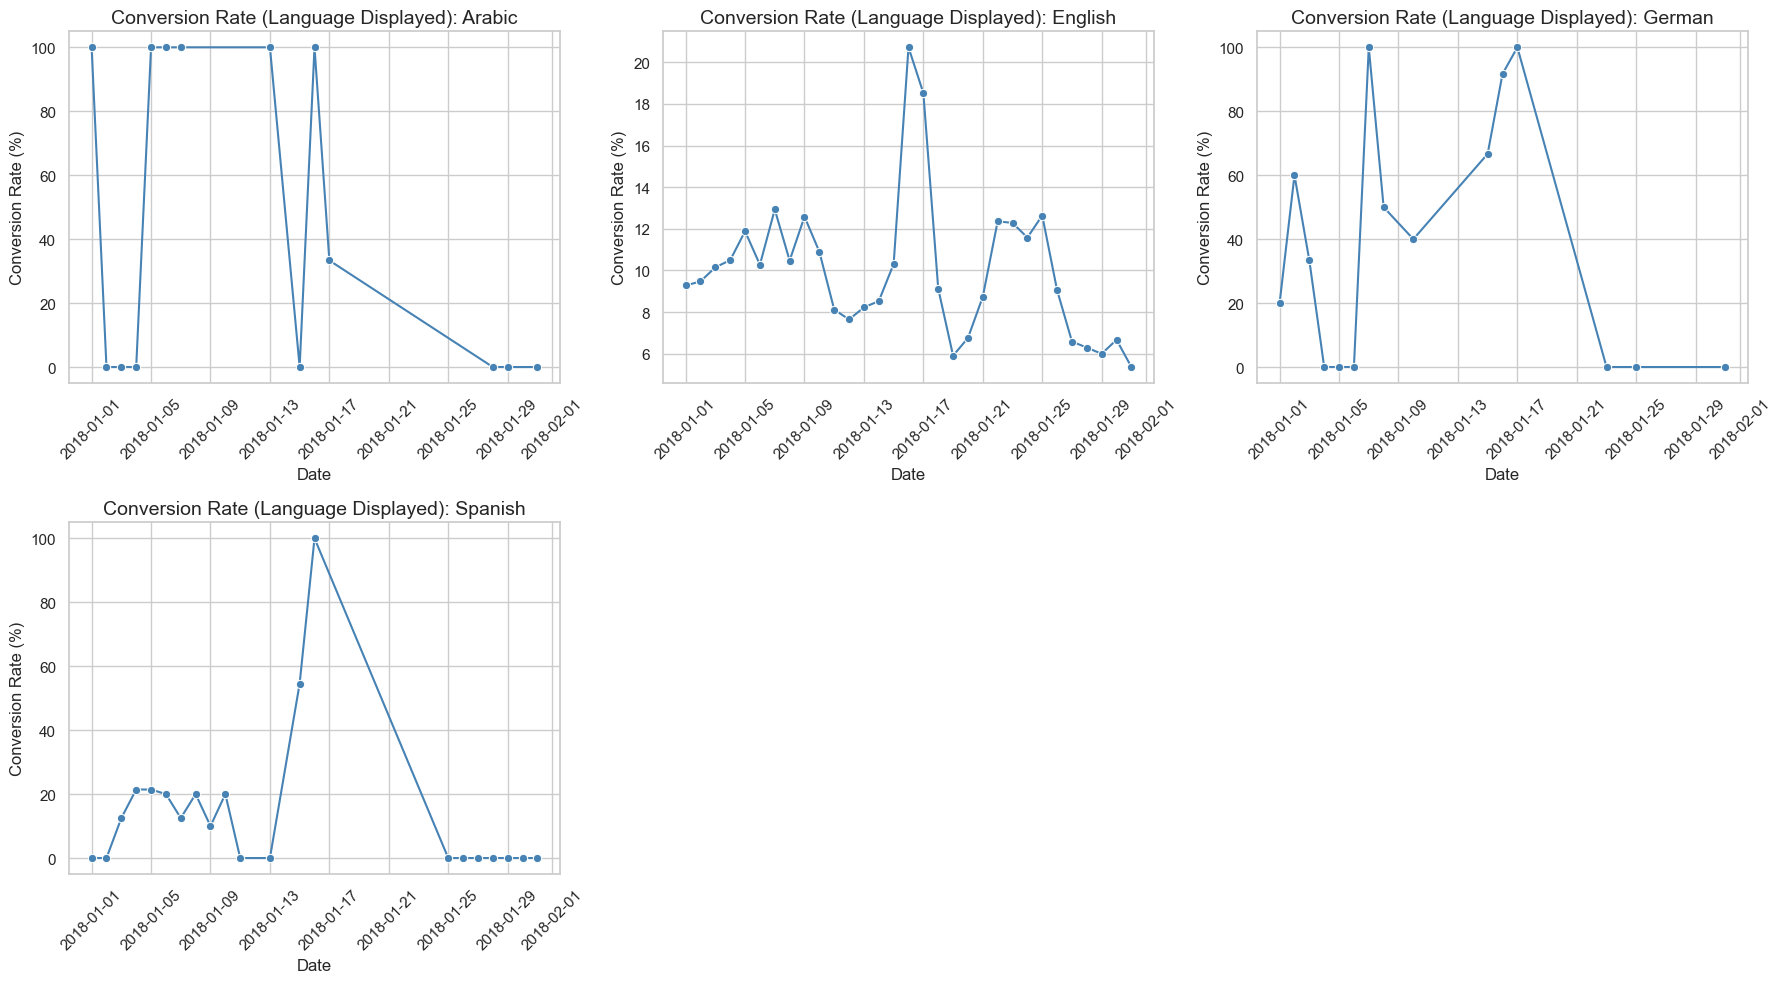

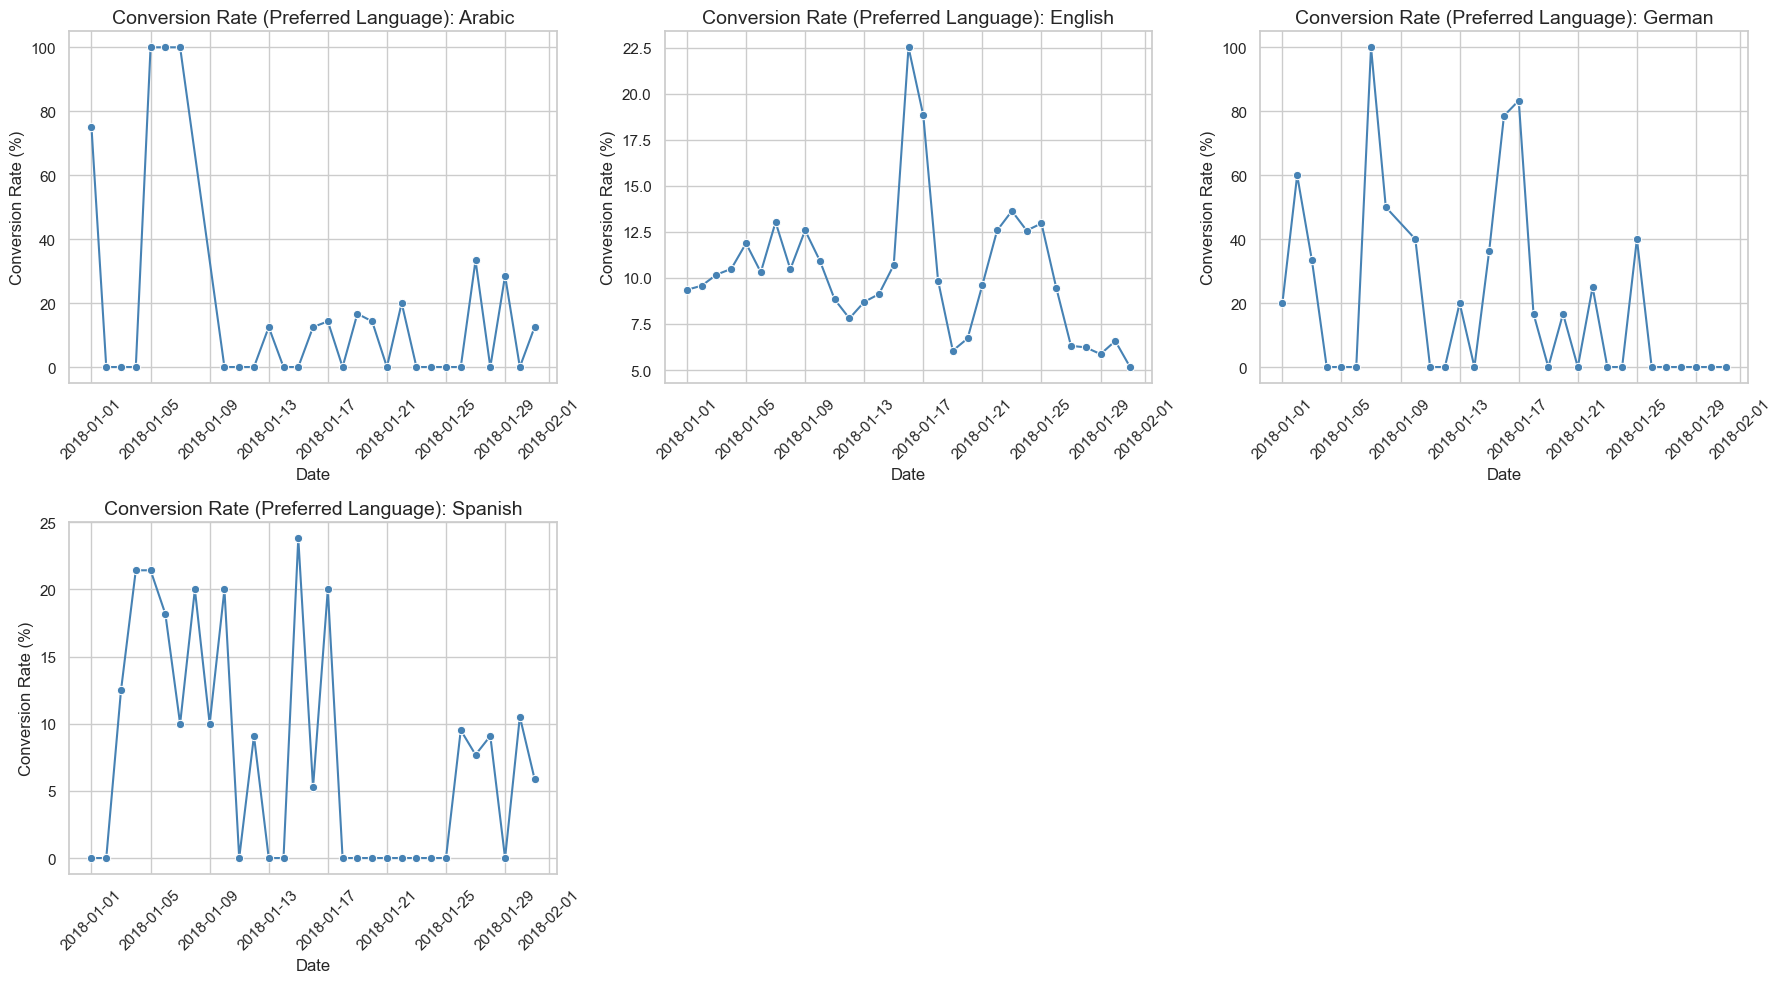

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate conversion rate by date served and language displayed
daily_conv_language_displayed = conversion_rate(marketing, ['date_served', 'language_displayed'])
daily_conv_language_displayed = daily_conv_language_displayed.reset_index()

# Step 2: Calculate conversion rate by date served and preferred language
daily_conv_language_preferred = conversion_rate(marketing, ['date_served', 'language_preferred'])
daily_conv_language_preferred = daily_conv_language_preferred.reset_index()

# Step 3: Get unique languages for both displayed and preferred language to plot in subplots
unique_languages_displayed = daily_conv_language_displayed['language_displayed'].unique()
unique_languages_preferred = daily_conv_language_preferred['language_preferred'].unique()

# Step 4: Set up subplot grid for languages displayed (rows and columns based on number of unique languages)
num_languages_displayed = len(unique_languages_displayed)
rows_displayed = (num_languages_displayed // 3) + 1
fig_displayed, axes_displayed = plt.subplots(nrows=rows_displayed, ncols=3, figsize=(18, 10))
axes_displayed = axes_displayed.flatten()

# Step 5: Plot daily conversion rate by language displayed
for i, language in enumerate(unique_languages_displayed):
    language_data = daily_conv_language_displayed[daily_conv_language_displayed['language_displayed'] == language]
    sns.lineplot(data=language_data, x='date_served', y='user_id', ax=axes_displayed[i], marker='o', color='steelblue')
    axes_displayed[i].set_title(f'Conversion Rate (Language Displayed): {language}', fontsize=14)
    axes_displayed[i].set_xlabel('Date', fontsize=12)
    axes_displayed[i].set_ylabel('Conversion Rate (%)', fontsize=12)
    axes_displayed[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots for languages displayed
for j in range(i + 1, len(axes_displayed)):
    fig_displayed.delaxes(axes_displayed[j])

# Tight layout for language displayed
plt.tight_layout()

# Show the plot for languages displayed
plt.show()

# Step 6: Set up subplot grid for preferred languages
num_languages_preferred = len(unique_languages_preferred)
rows_preferred = (num_languages_preferred // 3) + 1
fig_preferred, axes_preferred = plt.subplots(nrows=rows_preferred, ncols=3, figsize=(18, 10))
axes_preferred = axes_preferred.flatten()

# Step 7: Plot daily conversion rate by preferred language
for i, language in enumerate(unique_languages_preferred):
    language_data = daily_conv_language_preferred[daily_conv_language_preferred['language_preferred'] == language]
    sns.lineplot(data=language_data, x='date_served', y='user_id', ax=axes_preferred[i], marker='o', color='steelblue')
    axes_preferred[i].set_title(f'Conversion Rate (Preferred Language): {language}', fontsize=14)
    axes_preferred[i].set_xlabel('Date', fontsize=12)
    axes_preferred[i].set_ylabel('Conversion Rate (%)', fontsize=12)
    axes_preferred[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots for preferred languages
for j in range(i + 1, len(axes_preferred)):
    fig_preferred.delaxes(axes_preferred[j])

# Tight layout for preferred languages
plt.tight_layout()

# Show the plot for preferred languages
plt.show()


# 7. Daily Conversion Rate by Language Displayed

In this analysis, we visualize the daily conversion rates for different languages displayed in the marketing campaign. We aim to identify when specific languages stopped being offered and how this impacted overall conversion rates.

## Steps:

1. **Calculate Conversion Rates**:
   - Used the `conversion_rate` function to calculate daily conversion rates for each language, grouped by `date_served` and `language_displayed`.

2. **Identify Stop Dates**:
   - For each language, we identified the last day it was offered (i.e., the last day with non-zero data).
   - After this day, the language was no longer available, and we mark this stop date on the plot with a vertical red line.

3. **Plotting**:
   - Generated a separate subplot for each language to show its daily conversion rate.
   - Marked the stop date for languages that were discontinued with a red dashed line, while English remained available throughout.

4. **Layout and Grid**:
   - Applied professional formatting with labeled axes, grids, and tight layout for clarity and readability.


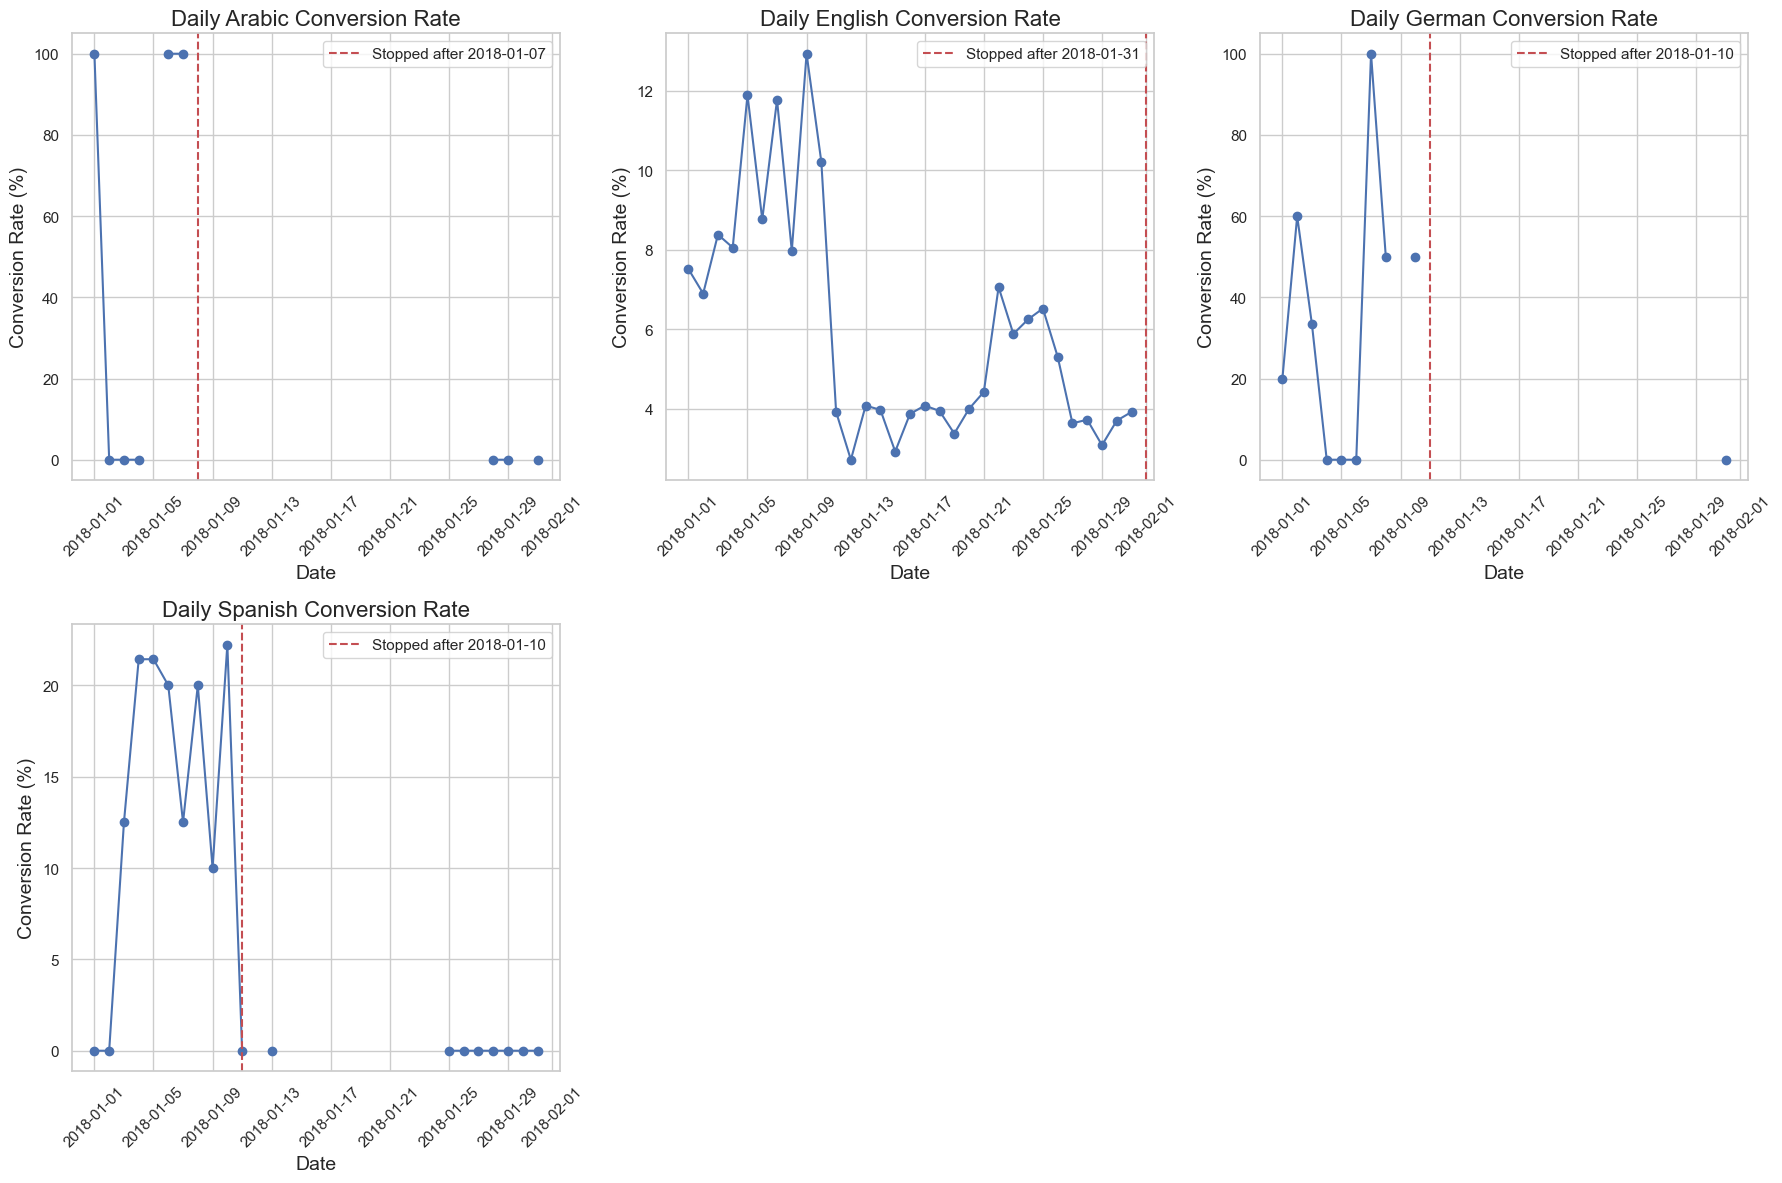

In [24]:
def plotting_conv(dataframe):
    # Set up the subplot grid based on the number of columns
    num_columns = len(dataframe.columns)
    rows = (num_columns // 3) + 1  # 3 subplots per row, adjust if needed
    fig, axes = plt.subplots(rows, 3, figsize=(18, 12))  # Adjusting figure size for better visibility
    
    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Loop through each column (language) to create a subplot
    for i, column in enumerate(dataframe.columns):
        # Plot the conversion rate
        axes[i].plot(dataframe.index, dataframe[column], marker='o', linestyle='-', color='b')
        axes[i].set_title(f'Daily {column} Conversion Rate', size=16)
        axes[i].set_xlabel('Date', size=14)
        axes[i].set_ylabel('Conversion Rate (%)', size=14)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True)  # Adding grid lines

        # Highlight the stop date for each language (when no data is present after a specific date)
        non_zero_days = dataframe[dataframe[column] > 0].index
        if not non_zero_days.empty:
            last_day = non_zero_days.max()  # Get the last day the language was offered
            stop_date = last_day + pd.Timedelta(days=1)  # The first day with no data
            axes[i].axvline(stop_date, color='r', linestyle='--', label=f'Stopped after {last_day.strftime("%Y-%m-%d")}')
            axes[i].legend()

    # Remove unused subplots, if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Tight layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use the updated plotting function to display results
plotting_conv(conv_lang_df)


# Findings: Language Availability and Conversion Rate Impact

- **English** was offered throughout the entire month, with no interruptions.
- However, all other languages stopped being offered at some point **before 12 January**.
- This discontinuation of languages significantly impacted the overall conversion rate for **House Ads**, leading to a noticeable drop during this period.
- The sharp drop in conversion rates can be attributed to the fact that English became the only available language, reducing the reach to non-English speakers, thus causing lower engagement and conversions.


# 8. Investigation: Impact of Language on Lost Subscriptions

This section investigates how many subscriptions were lost due to a language issue during a marketing campaign. Specifically, we compare the conversion rates of Spanish, Arabic, and German relative to English and calculate how many conversions were lost when these languages were no longer offered, and only English was used.

## Steps:

1. **Pre-error Conversion Rate Calculation**:
   - Calculated the conversion rates for each language (Spanish, Arabic, German) before the error (before January 11, 2018), when ads were only served in English.

2. **Conversion Rate Indices**:
   - Calculated the conversion rate index for each language compared to English to see how much better or worse each language converted relative to English.

3. **Data Aggregation**:
   - Grouped the data by date and preferred language, aggregating the number of unique users and conversions for each group.

4. **English Conversion Rate Calculation**:
   - Calculated the English conversion rate for the period after the error (January 11–31, 2018) when only English ads were served.

5. **Expected Conversion Rates**:
   - Used the pre-error language indices to calculate the expected conversion rates for Spanish, Arabic, and German if these languages had continued to be offered.

6. **Expected Conversions**:
   - Calculated the expected number of conversions for each language based on their expected conversion rates.

7. **Lost Subscribers**:
   - Calculated the total number of lost subscribers by comparing the expected conversions for each language with the actual conversions during the error period.


In [25]:
# Step 1: Calculate pre-error conversion rate for the period before the error (ads served in English)
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])

# Step 2: Calculate conversion rate indices (other languages vs English)
spanish_index = lang_conv['Spanish'] / lang_conv['English']
arabic_index = lang_conv['Arabic'] / lang_conv['English']
german_index = lang_conv['German'] / lang_conv['English']

# Print the calculated indices
print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

# Step 3: Group house ads data by date and language, aggregate number of unique users and conversions
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                     .agg({'user_id': 'nunique', 'converted': 'sum'})

# Step 4: Unstack the dataframe to have a clearer structure with separate columns for each language
converted_df = pd.DataFrame(converted.unstack(level=1))

# Step 5: Calculate English conversion rate for the affected period (from '2018-01-11' to '2018-01-31')
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31', ('converted', 'English')].sum() / \
                                    converted_df.loc['2018-01-11':'2018-01-31', ('user_id', 'English')].nunique()

# Step 6: Calculate expected conversion rates for Spanish, Arabic, and German based on the English rate and the indices
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate'] * spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate'] * arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate'] * german_index

# Step 7: Calculate the expected number of conversions for each language
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate'] * converted_df[('user_id', 'Spanish')] / 100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate'] * converted_df[('user_id', 'Arabic')] / 100
converted_df['expected_german_conv'] = converted_df['expected_german_rate'] * converted_df[('user_id', 'German')] / 100

# Step 8: Filter the relevant period ('2018-01-11' to '2018-01-31')
converted = converted_df.loc['2018-01-11':'2018-01-31']

# Step 9: Calculate the expected subscribers for Spanish, Arabic, and German combined
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + \
                converted['expected_german_conv'].sum()

# Step 10: Calculate the actual number of subscribers for the same period
actual_subs = converted[('converted', 'Spanish')].sum() + converted[('converted', 'Arabic')].sum() + \
              converted[('converted', 'German')].sum()

# Step 11: Calculate the number of lost subscribers by subtracting actual subscribers from expected subscribers
lost_subs = expected_subs - actual_subs
print("Lost subscribers:", lost_subs)


Spanish index: 1.6819248826291078
Arabic index: 5.045774647887324
German index: 4.485133020344288
Lost subscribers: 38.43306688081708


# Findings: Language Issue and Lost Subscriptions

Due to the discontinuation of ads in Spanish, Arabic, and German before January 12, 2018, we lost approximately **38 subscriptions** during the period from January 11 to January 31, 2018. This was calculated by comparing the expected conversions (if these languages had continued to be offered) with the actual conversions, which were lower due to the exclusive use of English ads.


# 9. Conclusion

In this project, we investigated the impact of a language-related issue on subscriptions during a marketing campaign. By calculating conversion rates before and after the error, we determined that:

1. **Pre-error period**: Spanish, Arabic, and German had higher conversion rates compared to English.
2. **Error period**: After January 11, 2018, only English ads were served, which caused a drop in conversion rates.
3. **Lost subscribers**: We calculated that approximately **38 subscriptions were lost** due to the absence of non-English ads.

This analysis highlights the importance of offering localized content to ensure higher engagement and conversion rates across different language groups.
